# Imports

In [2]:
import pandas as pd
import os
import io
from utils import read_file
from utils import convert_to_unsigned_np
from PIL import Image
import numpy as np
from scipy import signal 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import requests  # pip install requests 
import sys
import numpy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix
from score import compute_conf
from score import main



# variable names

In [3]:
DIR = "/data/isip/www/isip/courses/temple/ece_8527/resources/data/set_15/lists"
N = 10000

# Data Loading

### Labels

In [4]:
training_dir = "data_train_healthy.csv"
training_path = os.path.join(DIR,training_dir)
df_train_healthy = pd.read_csv(training_path)

training_dir = "data_train_unhealthy.csv"
training_path = os.path.join(DIR,training_dir)
df_train_unhealthy = pd.read_csv(training_path)

dev_dir = "data_dev_healthy.csv"
dev_path = os.path.join(DIR,dev_dir)
df_dev_healthy = pd.read_csv(dev_path)

dev_dir = "data_dev_unhealthy.csv"
dev_path = os.path.join(DIR,dev_dir)
df_dev_unhealthy = pd.read_csv(dev_path)



### Features

In [5]:
train_unhealthy_list = read_file(os.path.join(DIR,"data_train_unhealthy.list"))
train_healthy_list = read_file(os.path.join(DIR,"data_train_healthy.list"))
dev_unhealthy_list = read_file(os.path.join(DIR,"data_dev_unhealthy.list"))
dev_healthy_list = read_file(os.path.join(DIR,"data_dev_healthy.list"))

train_unhealthy_list= train_unhealthy_list.strip().split("\n")
assert len(train_unhealthy_list) == df_train_unhealthy.shape[0], "train data not right shape"

train_healthy_list= train_healthy_list.strip().split("\n")
assert len(train_healthy_list) == df_train_healthy.shape[0], "train data not right shape"

dev_unhealthy_list= dev_unhealthy_list.strip().split("\n")
assert len(dev_unhealthy_list) == df_dev_unhealthy.shape[0], "train data not right shape"

dev_healthy_list= dev_healthy_list.strip().split("\n")
assert len(dev_healthy_list) == df_dev_healthy.shape[0], "train data not right shape"

In [6]:
#train_unhealthy_array = [np.frombuffer(read_file(x),dtype=np.short).reshape((-1,8)) for x in train_unhealthy_list]
#train_healthy_array = [np.frombuffer(read_file(x),dtype=np.short).reshape((-1,8)) for x in train_healthy_list]

train_unhealthy_array = [np.frombuffer(read_file(x),dtype=np.short).reshape((-1,8)) for j,x in enumerate(train_unhealthy_list) if j < N]
train_healthy_array = [np.frombuffer(read_file(x),dtype=np.short).reshape((-1,8)) for j,x in enumerate(train_healthy_list) if j < N]

## Plot a sample

In [7]:
unhealthy_test = read_file(train_unhealthy_list[0])
healthy_test = read_file(train_healthy_list[0])
print("Unhealthy Byte")
print(train_unhealthy_list[0])

print("Unhealthy Byte")
print(train_healthy_list[0])


Unhealthy Byte
/data/isip/data/tnmg_code/v1.0.0/data/S0300000/0304/0304411/TNMG304411_N1.dat
Unhealthy Byte
/data/isip/data/tnmg_code/v1.0.0/data/S2910000/2919/2919827/TNMG2919827_N1.dat


# EXTRACT DATA TO NP ARRAY

In [8]:


unhealthy_test_np = np.frombuffer(unhealthy_test, dtype=np.short, count = -1).reshape((-1,8))
numpy.set_printoptions(threshold=sys.maxsize)
print('unhealthy data:')
print(unhealthy_test_np)

healthy_test_np = np.frombuffer(healthy_test, dtype=np.short, count = -1).reshape((-1,8))
numpy.set_printoptions(threshold=sys.maxsize)
print('healthy data:')
print(healthy_test_np)



unhealthy data:
[[ -32  -30   28    5  -20  -21  -29   -1]
 [ -29  -30   27    6  -21  -20  -29    0]
 [ -28  -27   27    6  -19  -20  -30    0]
 [ -30  -27   26    6  -19  -21  -30    0]
 [ 167   75 -176 -127  -63   51  126  156]
 [ 149   57 -146  -94  -48   51  118  144]
 [ 132   43 -123  -76  -40   49  107  129]
 [ 114   31  -99  -70  -35   39   93  113]
 [  93   18  -75  -75  -33   25   75   98]
 [  74    7  -53  -80  -35   10   56   80]
 [  56    0  -37  -82  -34   -2   38   60]
 [  40   -4  -20  -80  -29  -10   24   43]
 [  23   -5   -6  -77  -21  -15   11   30]
 [  10   -7    4  -70  -13  -15    3   17]
 [  -3  -12   18  -63   -7  -16   -4    4]
 [ -16  -22   30  -57   -1  -19  -15   -9]
 [ -28  -31   42  -52    0  -24  -23  -22]
 [ -41  -37   51  -49    1  -25  -30  -33]
 [ -49  -42   57  -46    3  -24  -35  -39]
 [ -53  -43   61  -45    7  -23  -35  -44]
 [ -54  -43   63  -43   11  -23  -34  -47]
 [ -57  -45   65  -42   13  -23  -36  -48]
 [ -57  -47   66  -44   11  -24  -38  

Unhealthy Plots:
Unhealthy channel  0


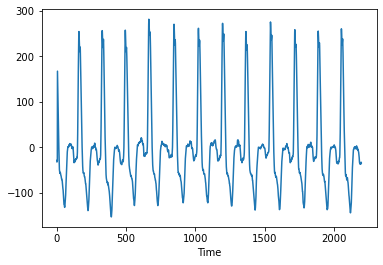

Unhealthy channel  1


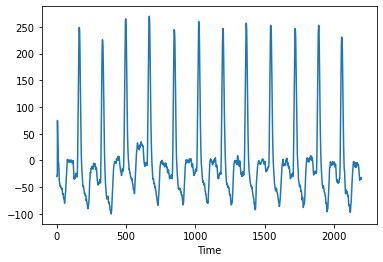

Unhealthy channel  2


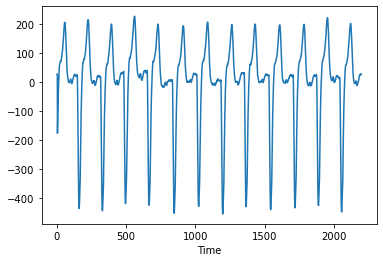

Unhealthy channel  3


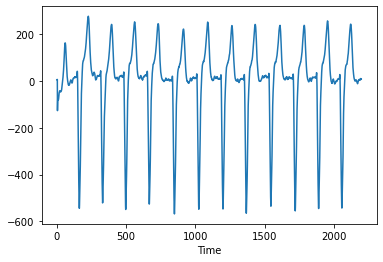

Unhealthy channel  4


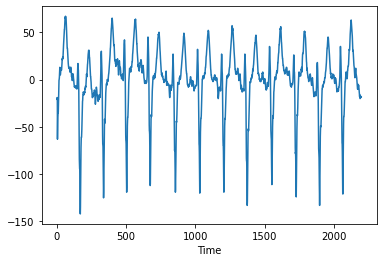

Unhealthy channel  5


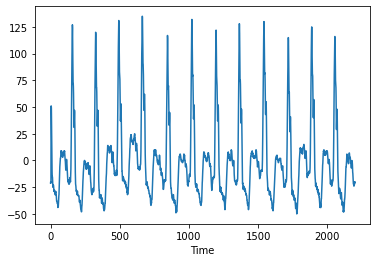

Unhealthy channel  6


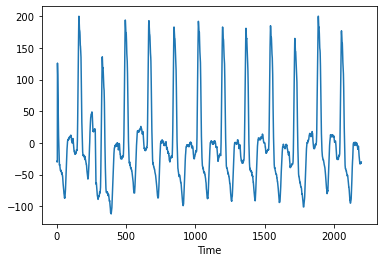

Unhealthy channel  7


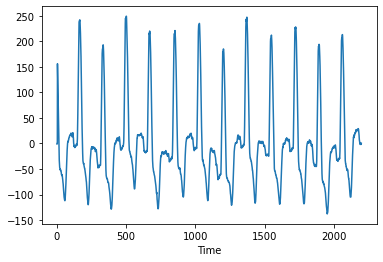

In [9]:
print("Unhealthy Plots:")
for j in range(8):
    print("Unhealthy channel ", j)
    fig = plt.plot(unhealthy_test_np[:,j])
    plt.xlabel('Time')
    

    plt.show()



Healthy Plots:
Healthy channel  0


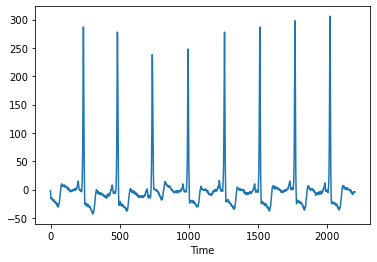

Healthy channel  1


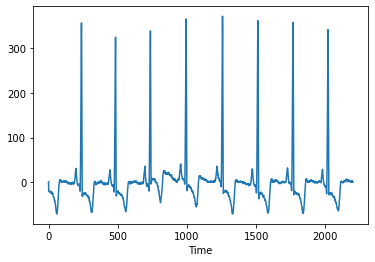

Healthy channel  2


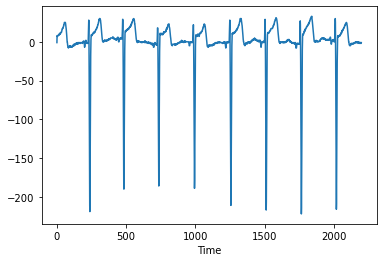

Healthy channel  3


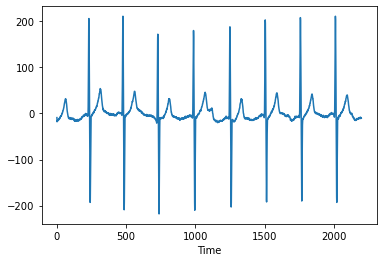

Healthy channel  4


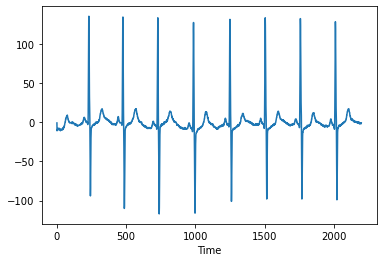

Healthy channel  5


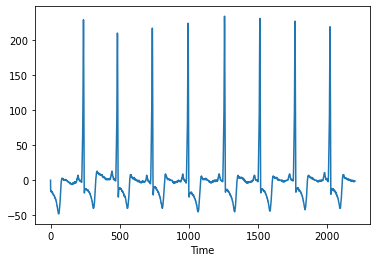

Healthy channel  6


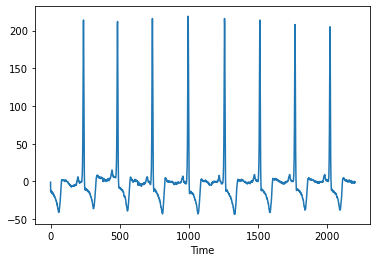

Healthy channel  7


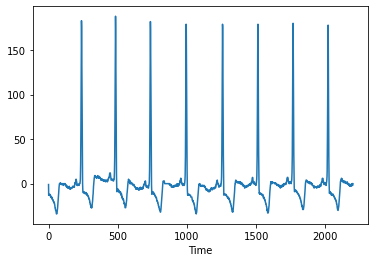

In [10]:
print("Healthy Plots:")
for j in range(8):
    print("Healthy channel ", j)
    fig = plt.plot(healthy_test_np[:,j])
    plt.xlabel('Time')
    

    plt.show()

In [11]:

import numpy as np
from scipy.integrate import simpson
from numpy import trapz


# The y values.  A numpy array is used here,
# but a python list could also be used.
y = healthy_test_np[:,0]

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simpson(y, dx=5)
print("area =", area)

area = -9895.0
area = -9937.916666666666


Healthy channel  0
Unhealthy channel  0


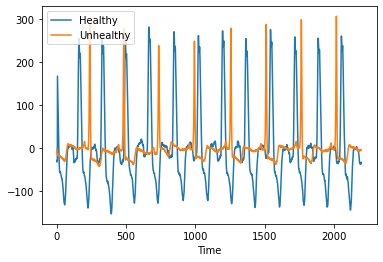

In [12]:
# plot healthy vs unhealthy
j=0

print("Healthy channel ", j)
fig = plt.plot(unhealthy_test_np[:,j], label = "Healthy")
plt.xlabel('Time')


print("Unhealthy channel ", j)
fig = plt.plot(healthy_test_np[:,j], label = "Unhealthy")
plt.xlabel('Time')

plt.legend()

Healthy channel  0
Unhealthy channel  0


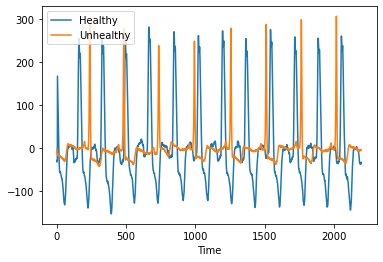

Healthy channel  1
Unhealthy channel  1


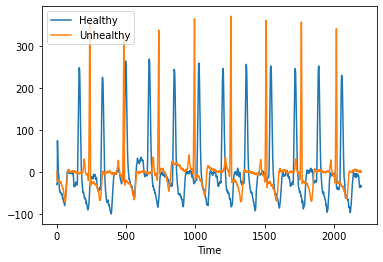

Healthy channel  2
Unhealthy channel  2


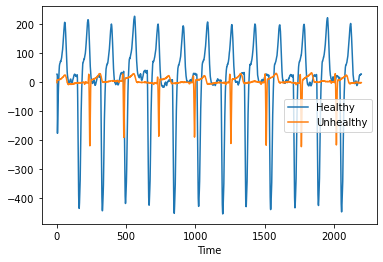

Healthy channel  3
Unhealthy channel  3


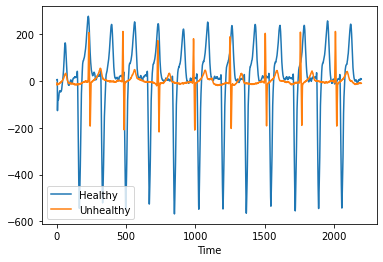

Healthy channel  4
Unhealthy channel  4


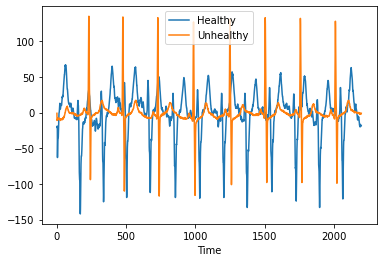

Healthy channel  5
Unhealthy channel  5


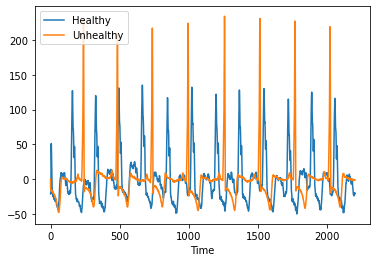

Healthy channel  6
Unhealthy channel  6


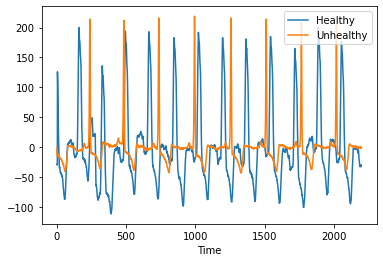

Healthy channel  7
Unhealthy channel  7


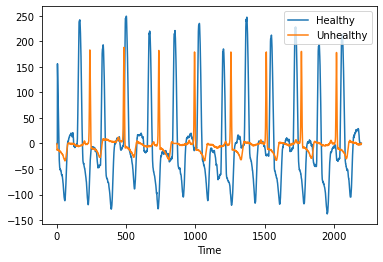

In [14]:
for j in range(8):
    
    print("Healthy channel ", j)
    fig = plt.plot(unhealthy_test_np[:,j], label = "Healthy")
    plt.xlabel('Time')

    print("Unhealthy channel ", j)
    fig = plt.plot(healthy_test_np[:,j], label = "Unhealthy")
    plt.xlabel('Time')
    
    plt.legend()

    plt.show()